## Analysis of Spotify's Top 50 Songs of 2023 Data


Spotify, a dominant music streaming platform, curates a Top 50 list highlighting the most streamed songs. This analysis delves into the 2023 edition, exploring factors like popularity, artist names, and genres. By dissecting these elements, we aim to unlock the secrets behind these global hits, uncovering the reasons why they resonate with listeners worldwide.

**Project Ideas for Further Exploration:**

1. Trend Analysis Over Years: Explore how music trends have changed over different years using historical data.

2. Predictive Models for Hit Songs: Develop models to predict which songs are likely to become hits based on various features.

3. Sentiment Analysis of Lyrics: Analyze the emotional content of song lyrics to gain insights into listener preferences.

4. Artist Collaboration Network: Investigate the network of collaborations between artists to understand trends and patterns in the music industry.

5. Genre Diversity and Evolution: Study how music genres have evolved and diversified over time.

6. Geographical Analysis of Music Popularity: Analyze the popularity of music across different regions and countries to identify geographic trends.

7. Audio Feature Analysis: Examine the audio features of songs to understand their characteristics and how they influence popularity.


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the Spotify data from 'spotify_data.csv' into a DataFrame
data = pd.read_csv('spotify_data.csv')

In [3]:
# Display the first few rows of the dataset
data.head()

,artist_name,track_name,is_explicit,album_release_date,genres,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity
0,Miley Cyrus,Flowers,False,2023-08-18,['pop'],0.706,0.632,0.691,-4.775,0.0584,0.000070,0.0232,0.0633,0,118.048,1,200600,4,94
1,SZA,Kill Bill,False,2022-12-08,"['pop', 'r&b', 'rap']",0.644,0.418,0.735,-5.747,0.0521,0.144000,0.1610,0.0391,8,88.980,1,153947,4,86
2,Harry Styles,As It Was,False,2022-05-20,['pop'],0.520,0.662,0.731,-5.338,0.3420,0.001010,0.3110,0.0557,6,173.930,0,167303,4,95
3,Jung Kook,Seven (feat. Latto) (Explicit Ver.),True,2023-11-03,['k-pop'],0.790,0.872,0.831,-4.185,0.3120,0.000000,0.0797,0.0440,11,124.987,1,183551,4,90
4,Eslabon Armado,Ella Baila Sola,False,2023-04-28,"['corrido', 'corridos tumbados', 'sad sierreno...",0.668,0.834,0.758,-5.176,0.4830,0.000019,0.0837,0.0332,5,147.989,0,165671,3,86


In [4]:
# Display the shape of the dataset
data.shape

(50, 19)

The dataset has 50 records with features like track name , artist_name , loudness , popularity etc

In [5]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         50 non-null     object 
 1   track_name          50 non-null     object 
 2   is_explicit         50 non-null     bool   
 3   album_release_date  50 non-null     object 
 4   genres              50 non-null     object 
 5   danceability        50 non-null     float64
 6   valence             50 non-null     float64
 7   energy              50 non-null     float64
 8   loudness            50 non-null     float64
 9   acousticness        50 non-null     float64
 10  instrumentalness    50 non-null     float64
 11  liveness            50 non-null     float64
 12  speechiness         50 non-null     float64
 13  key                 50 non-null     int64  
 14  tempo               50 non-null     float64
 15  mode                50 non-null     int64  
 16  duration_m

The dataset contains 50 entries and 19 columns, with a mix of data types including bool, float64, int64, and object.

Key columns include:
- **artist_name**: Name of the artist
- **track_name**: Name of the track
- **is_explicit**: Whether the track contains explicit content
- **genres**: Genres associated with the track
- **popularity**: Popularity score

Other columns include various audio features such as danceability, valence, energy, etc.

In [6]:
# Check for missing values in the dataset
data.isna().sum()

artist_name           0
track_name            0
is_explicit           0
album_release_date    0
genres                0
danceability          0
valence               0
energy                0
loudness              0
acousticness          0
instrumentalness      0
liveness              0
speechiness           0
key                   0
tempo                 0
mode                  0
duration_ms           0
time_signature        0
popularity            0
dtype: int64

In [7]:
# Check for duplicated rows in the dataset
data.duplicated().sum()

0

This indicates that there are no missing values or duplicates in the dataset.

# Exploratory Data Analysis

**Number of Songs by Top 5 Artists**

In [8]:
# Count songs by each artist
top_artists = data['artist_name'].value_counts()

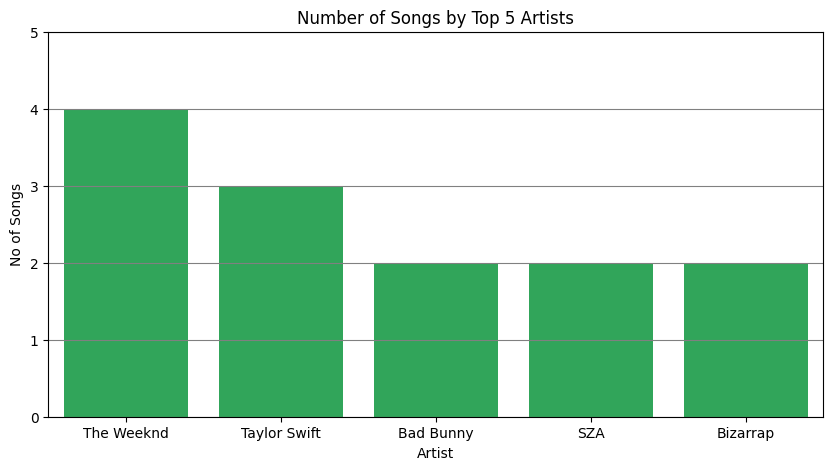

In [9]:
# Plotting the number of songs by the top 5 artists
plt.figure(figsize=(10, 5))
top_5_artists = top_artists.head(5)

sns.barplot(x=top_5_artists.index, y=top_5_artists.values, color='#1DB954')
plt.xlabel('Artist')
plt.ylabel('No of Songs')
plt.title('Number of Songs by Top 5 Artists')
plt.grid(axis='y', color='grey')
plt.ylim(0, 5)
plt.show()

In 2023, 'The Weeknd' tops the list with four songs in the top 50, followed closely by 'Taylor Swift' with three songs. 'Bad Bunny', 'SZA', and 'Bizarrap' also make it to the top five artists with significant presence in the rankings.

**Distribution of Songs by Release Month**

In [10]:
# Converting 'album_release_date' to datetime format
data['album_release_date'] = data['album_release_date'].astype('datetime64[ns]')

# Extracting the month from 'album_release_date' and storing it in 'album_release_month'
data['album_release_month'] = data['album_release_date'].dt.month

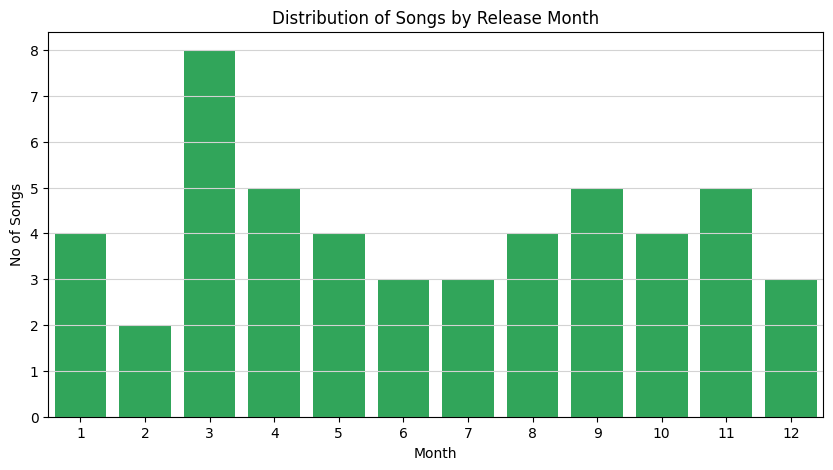

In [11]:
# Plotting the distribution of songs by release month
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='album_release_month', color='#1DB954')
plt.xlabel('Month')
plt.ylabel('No of Songs')
plt.title('Distribution of Songs by Release Month')
plt.grid(axis='y', color='lightgrey')
plt.show()

Out of the top 50 songs, eight were released in March. Comparing this with data from previous years could reveal insights into seasonal trends in music releases.

**Popularity of Top Tracks by Top 5 Artists**

The "popularity" metric in the dataset likely indicates the relative popularity of a song, which may be based on factors such as streaming counts, radio airplay, or listener engagement. A higher popularity score suggests that a song is more widely recognized, listened to, or favored by audiences compared to others.

In [12]:
# Filter the data to include only songs by the top 5 artists
popularity = data[data['artist_name'].isin(top_5_artists.index)]

# Display the index of the top 5 artists
top_5_artists.index

Index(['The Weeknd', 'Taylor Swift', 'Bad Bunny', 'SZA', 'Bizarrap'], dtype='object')

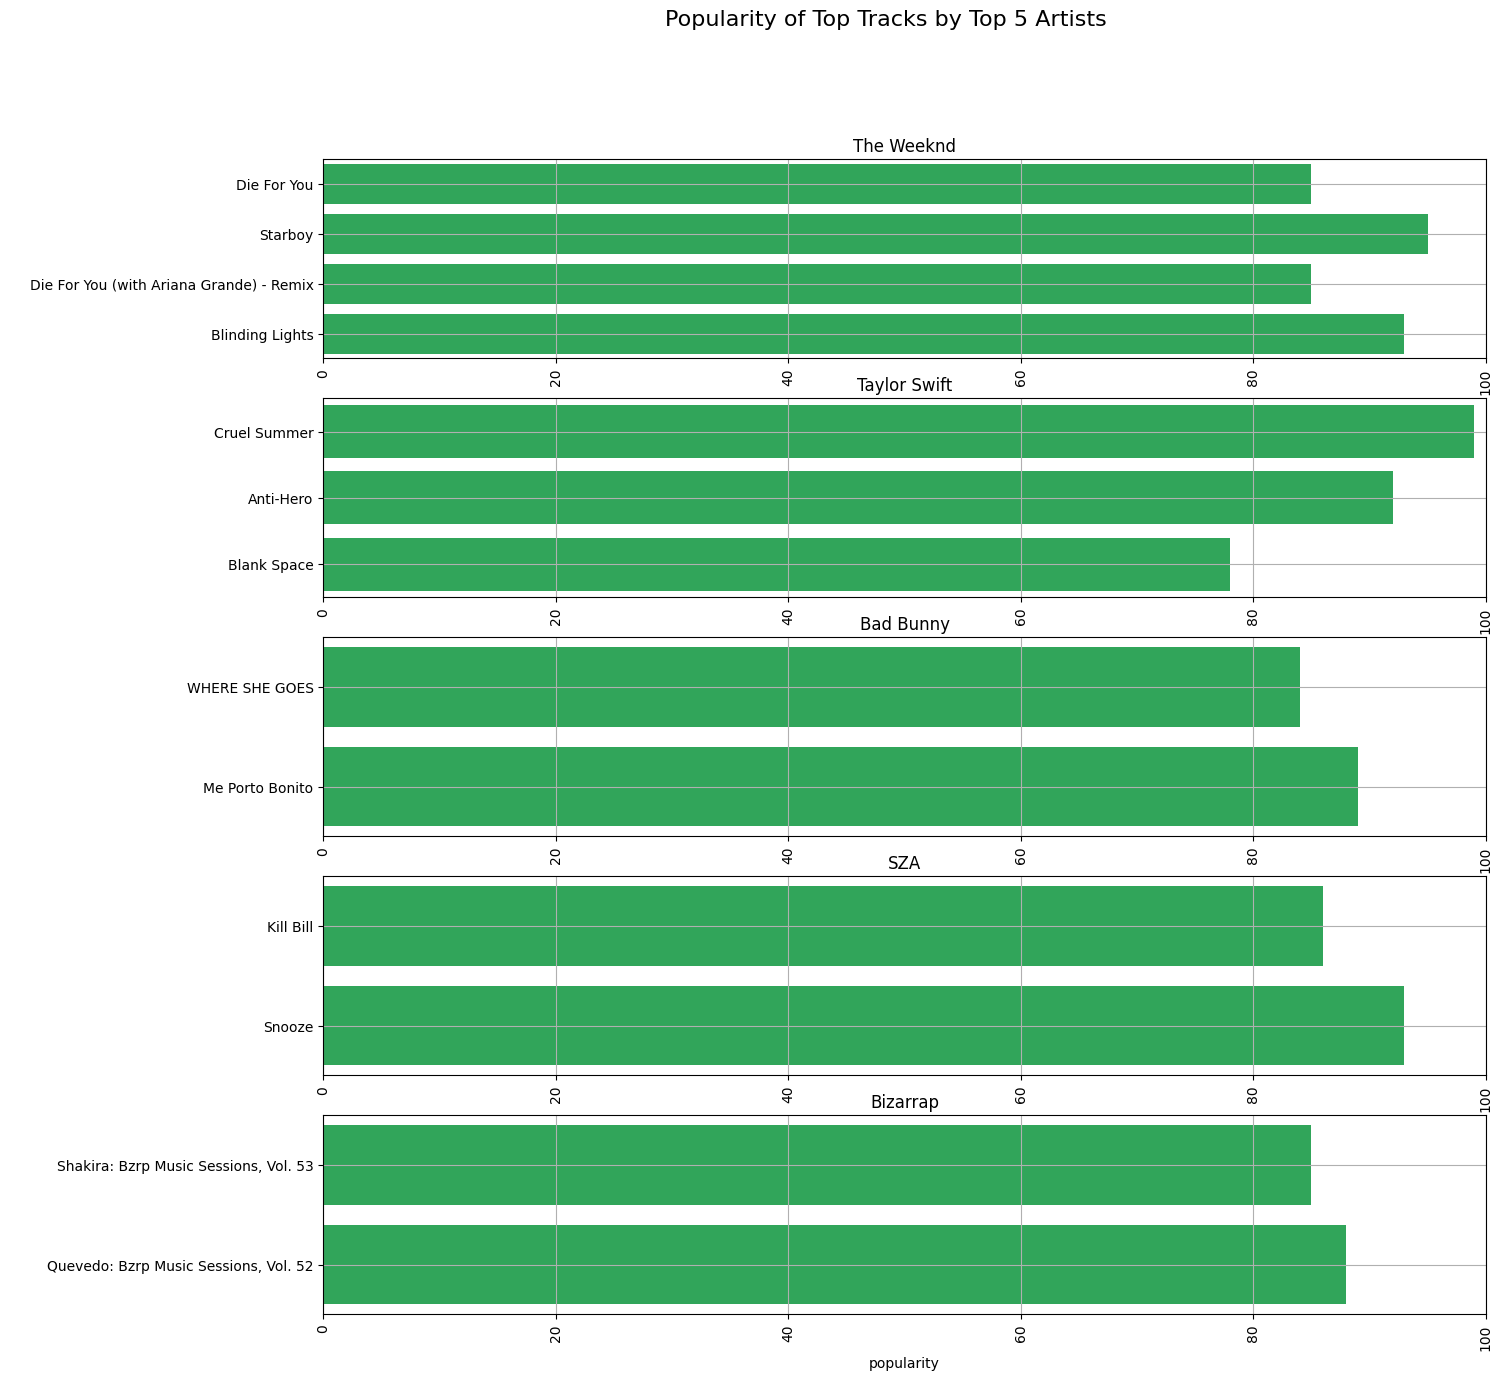

In [13]:
# Plotting the popularity of top tracks by the top 5 artists
plt.figure(figsize=(15, 15))

# Loop through the top 5 artists
for i in range(5):
    plt.subplot(5, 1, i + 1)
    sns.barplot(data=popularity[popularity['artist_name'] == top_5_artists.index[i]],
                x='popularity', y='track_name' , color = '#1DB954')
    plt.xticks(rotation=90)
    plt.xlim(0,100)
    plt.grid('lightgrey')
    plt.ylabel(' ')
    plt.title(top_5_artists.index[i])
plt.suptitle('Popularity of Top Tracks by Top 5 Artists', fontsize=16)
plt.show()

While The Weeknd has more songs in the top 5 than Taylor Swift, "Cruel Summer" by Taylor Swift appears to be more popular than any other song by the top artists in the top songs. The charts above illustrate the popularity of songs by the top 5 artists.

In [14]:
# Filter the data to find the song with the highest popularity score
data[data['popularity'] == data['popularity'].max()]

,artist_name,track_name,is_explicit,album_release_date,genres,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity,album_release_month
5,Taylor Swift,Cruel Summer,False,2019-08-23,['pop'],0.552,0.564,0.702,-5.707,0.117,0.000021,0.105,0.157,9,169.994,1,178427,4,99,8


"Cruel Summer" has the highest popularity score in the dataset, with a score of 99.

**Genre Distribution**

This indicates that the records are in the form of strings instead of lists. To explore this column, we first need to convert it into a Python list and then work on it.

In [15]:
import ast

# Convert the 'genres' column from strings to lists
data['genres'] = data['genres'].apply(ast.literal_eval)

# Explode the 'genres' column to separate the lists into individual rows
genres = data['genres']
genres = genres.explode('genres')

In [16]:
# Count the occurrences of each genre
genres = genres.value_counts()

# Reset the index to make 'genres' a column again
genres = genres.reset_index()

In [17]:
# Rename the columns
genres = genres.rename({'index': 'genres', 'genres': 'count'}, axis=1)

# Display the first few rows
genres.head()

,genres,count
0,pop,17
1,urbano latino,10
2,trap latino,10
3,reggaeton,9
4,rap,5


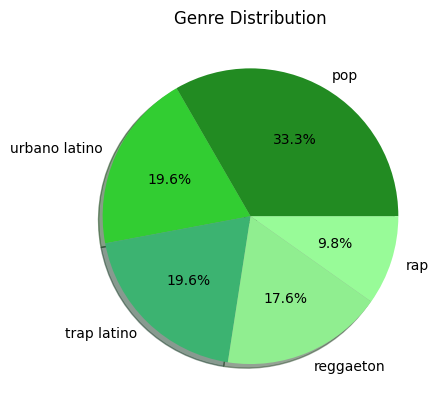

In [18]:
# Plotting a pie chart for the top 5 genres
plt.pie(genres['count'][0:5], labels=genres['genres'][0:5], autopct='%1.1f%%', shadow=True, colors=[
    '#228B22',  # Forest Green
    '#32CD32',  # Lime Green
    '#3CB371',  # Medium Sea Green
    '#90EE90',  # Light Green
    '#98FB98'   # Pale Green
])
plt.title('Genre Distribution')
plt.show()

The pie chart illustrates the diversity of the music industry, with pop music leading at 33.3%, followed by urbano latino and rap at 19.6% each. This varied landscape suggests that focusing on pop artists could potentially enhance Spotify's profits, considering its dominant presence in the market and diverse audience preferences.

**Explicit Content Distribution**

In [19]:
labels = ['True', 'False']

# Count the occurrences of explicit content
explicit_content = data['is_explicit'].value_counts().reset_index()

In [20]:
# Display the counts of explicit content
explicit_content

,index,is_explicit
0,False,28
1,True,22


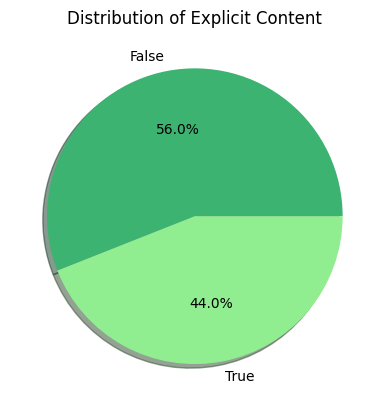

In [21]:
# Plotting a pie chart to show the distribution of explicit and non-explicit content
plt.pie(explicit_content['is_explicit'], labels=explicit_content['index'], autopct='%1.1f%%', shadow=True, colors=[
    '#3CB371',  # Medium Sea Green
    '#90EE90',  # Light Green
])
plt.title('Distribution of Explicit Content')
plt.show()

The dataset indicates that 28 tracks are labeled as non-explicit, while 22 tracks are marked as explicit, suggesting a notable presence of explicit content among the analyzed songs.

**Distribution of Song Durations**

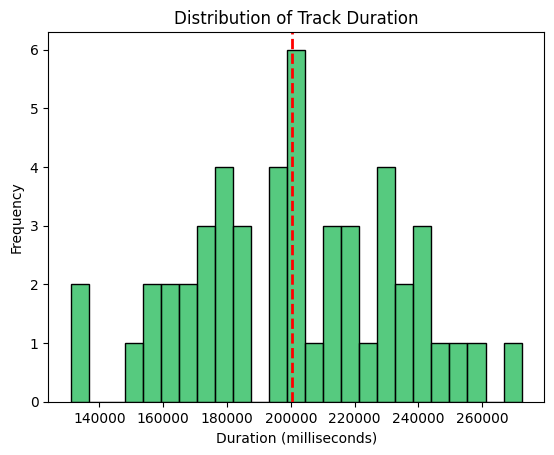

In [22]:
# Plotting a histogram to show the distribution of track durations
sns.histplot(data=data, x='duration_ms', bins=25, color='#1DB954')
plt.axvline(data['duration_ms'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.title('Distribution of Track Duration')
plt.xlabel('Duration (milliseconds)')
plt.ylabel('Frequency')
plt.show()

The dataset includes track durations ranging from approximately 140 seconds to 280 seconds, with popular songs averaging around 200 seconds. This indicates variability in song lengths and a tendency towards a certain duration range among top tracks.

**Distribution of Song Loudness Levels**

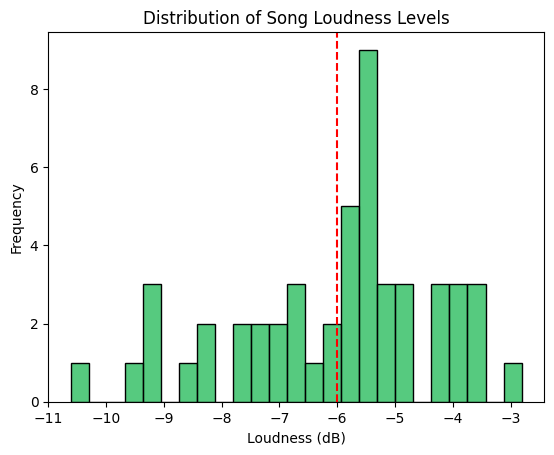

In [23]:
# Plotting a histogram to show the distribution of song loudness levels
sns.histplot(data=data, x='loudness', bins=25, color='#1DB954')
plt.axvline(data['loudness'].mean(), color='red', linestyle='dashed')
plt.title('Distribution of Song Loudness Levels')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frequency')
plt.show()

The histogram shows a concentration of audio tracks around the -6 loudness level, indicating a common preference, but also highlights diversity in loudness levels across the dataset.

In [24]:
# Explode genres for genre-wise popularity analysis
genre_popularity =  data[['genres' , 'popularity']]
genre_popularity = genre_popularity.explode('genres')
genre_popularity.reset_index(drop = True)

,genres,popularity
0,pop,94
1,pop,86
2,r&b,86
3,rap,86
4,pop,95
...,...,...
121,corridos tumbados,81
122,musica mexicana,81
123,sad sierreno,81
124,sierreno,81


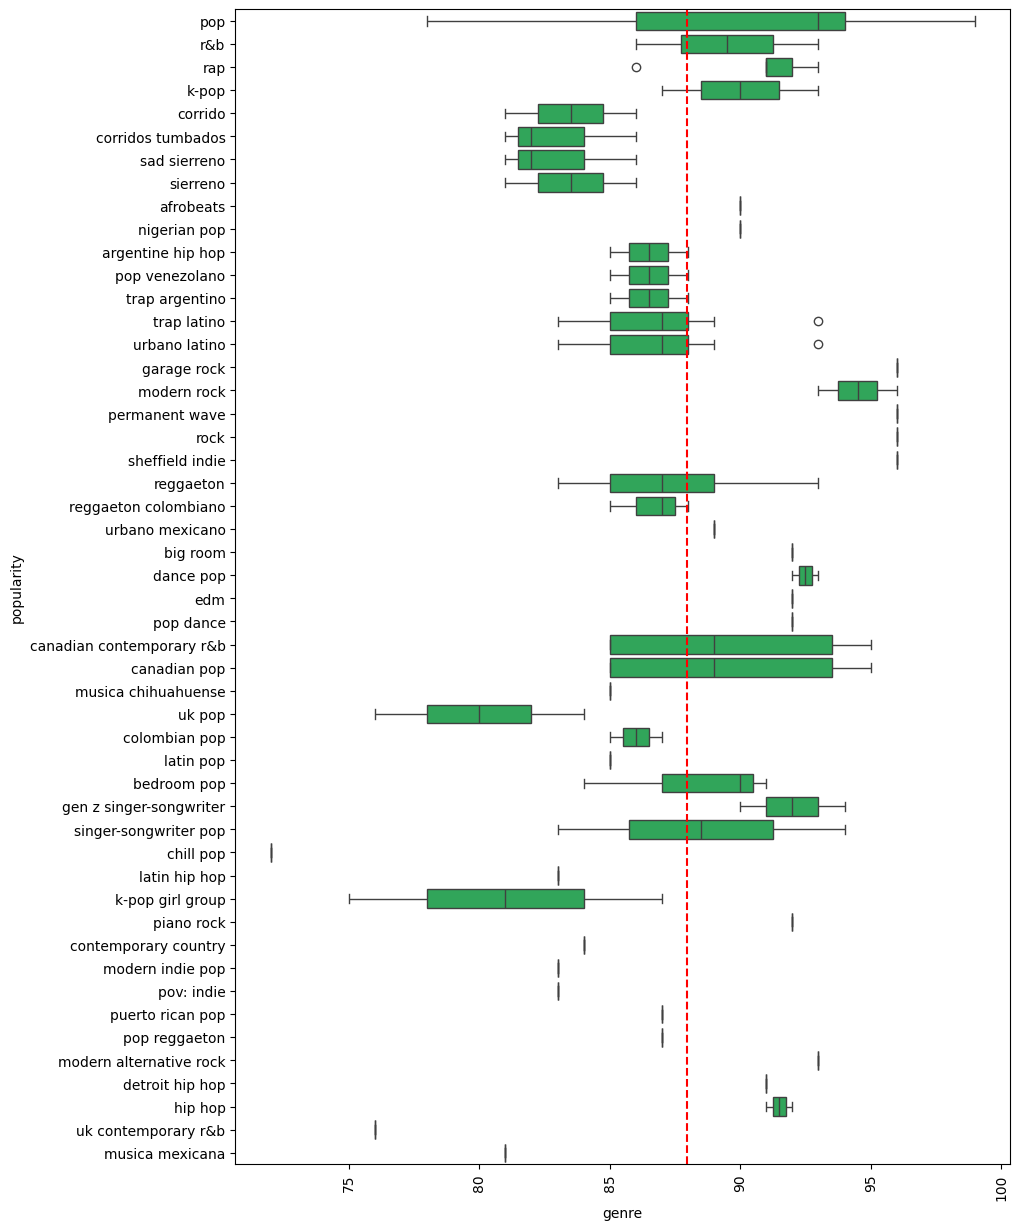

In [25]:
# Comparing song popularity by genre using a boxplot
plt.figure(figsize = (10,15))
sns.boxplot(data = genre_popularity ,  y = 'genres' , x = 'popularity' , color = '#1DB954')
plt.axvline( x = genre_popularity['popularity'].mean() , linestyle ='dashed' , color = 'red')
plt.xlabel('genre')
plt.ylabel('popularity')
plt.xticks(rotation = 90)
plt.show()

Analysing popularity across genres reveals "pop" reigns supreme with an average rating around 95, while "chill pop" falls short at approximately 75. This trend, with an overall mean of 90, suggests prioritizing pop music could be a strategic advantage.

**Plots of Numerical Variables**

In [26]:
variables = ['danceability', 'valence', 'energy', 'loudness', 'acousticness', 
             'instrumentalness', 'liveness', 'speechiness', 'key', 'tempo', 
             'mode', 'duration_ms', 'time_signature', 'popularity']

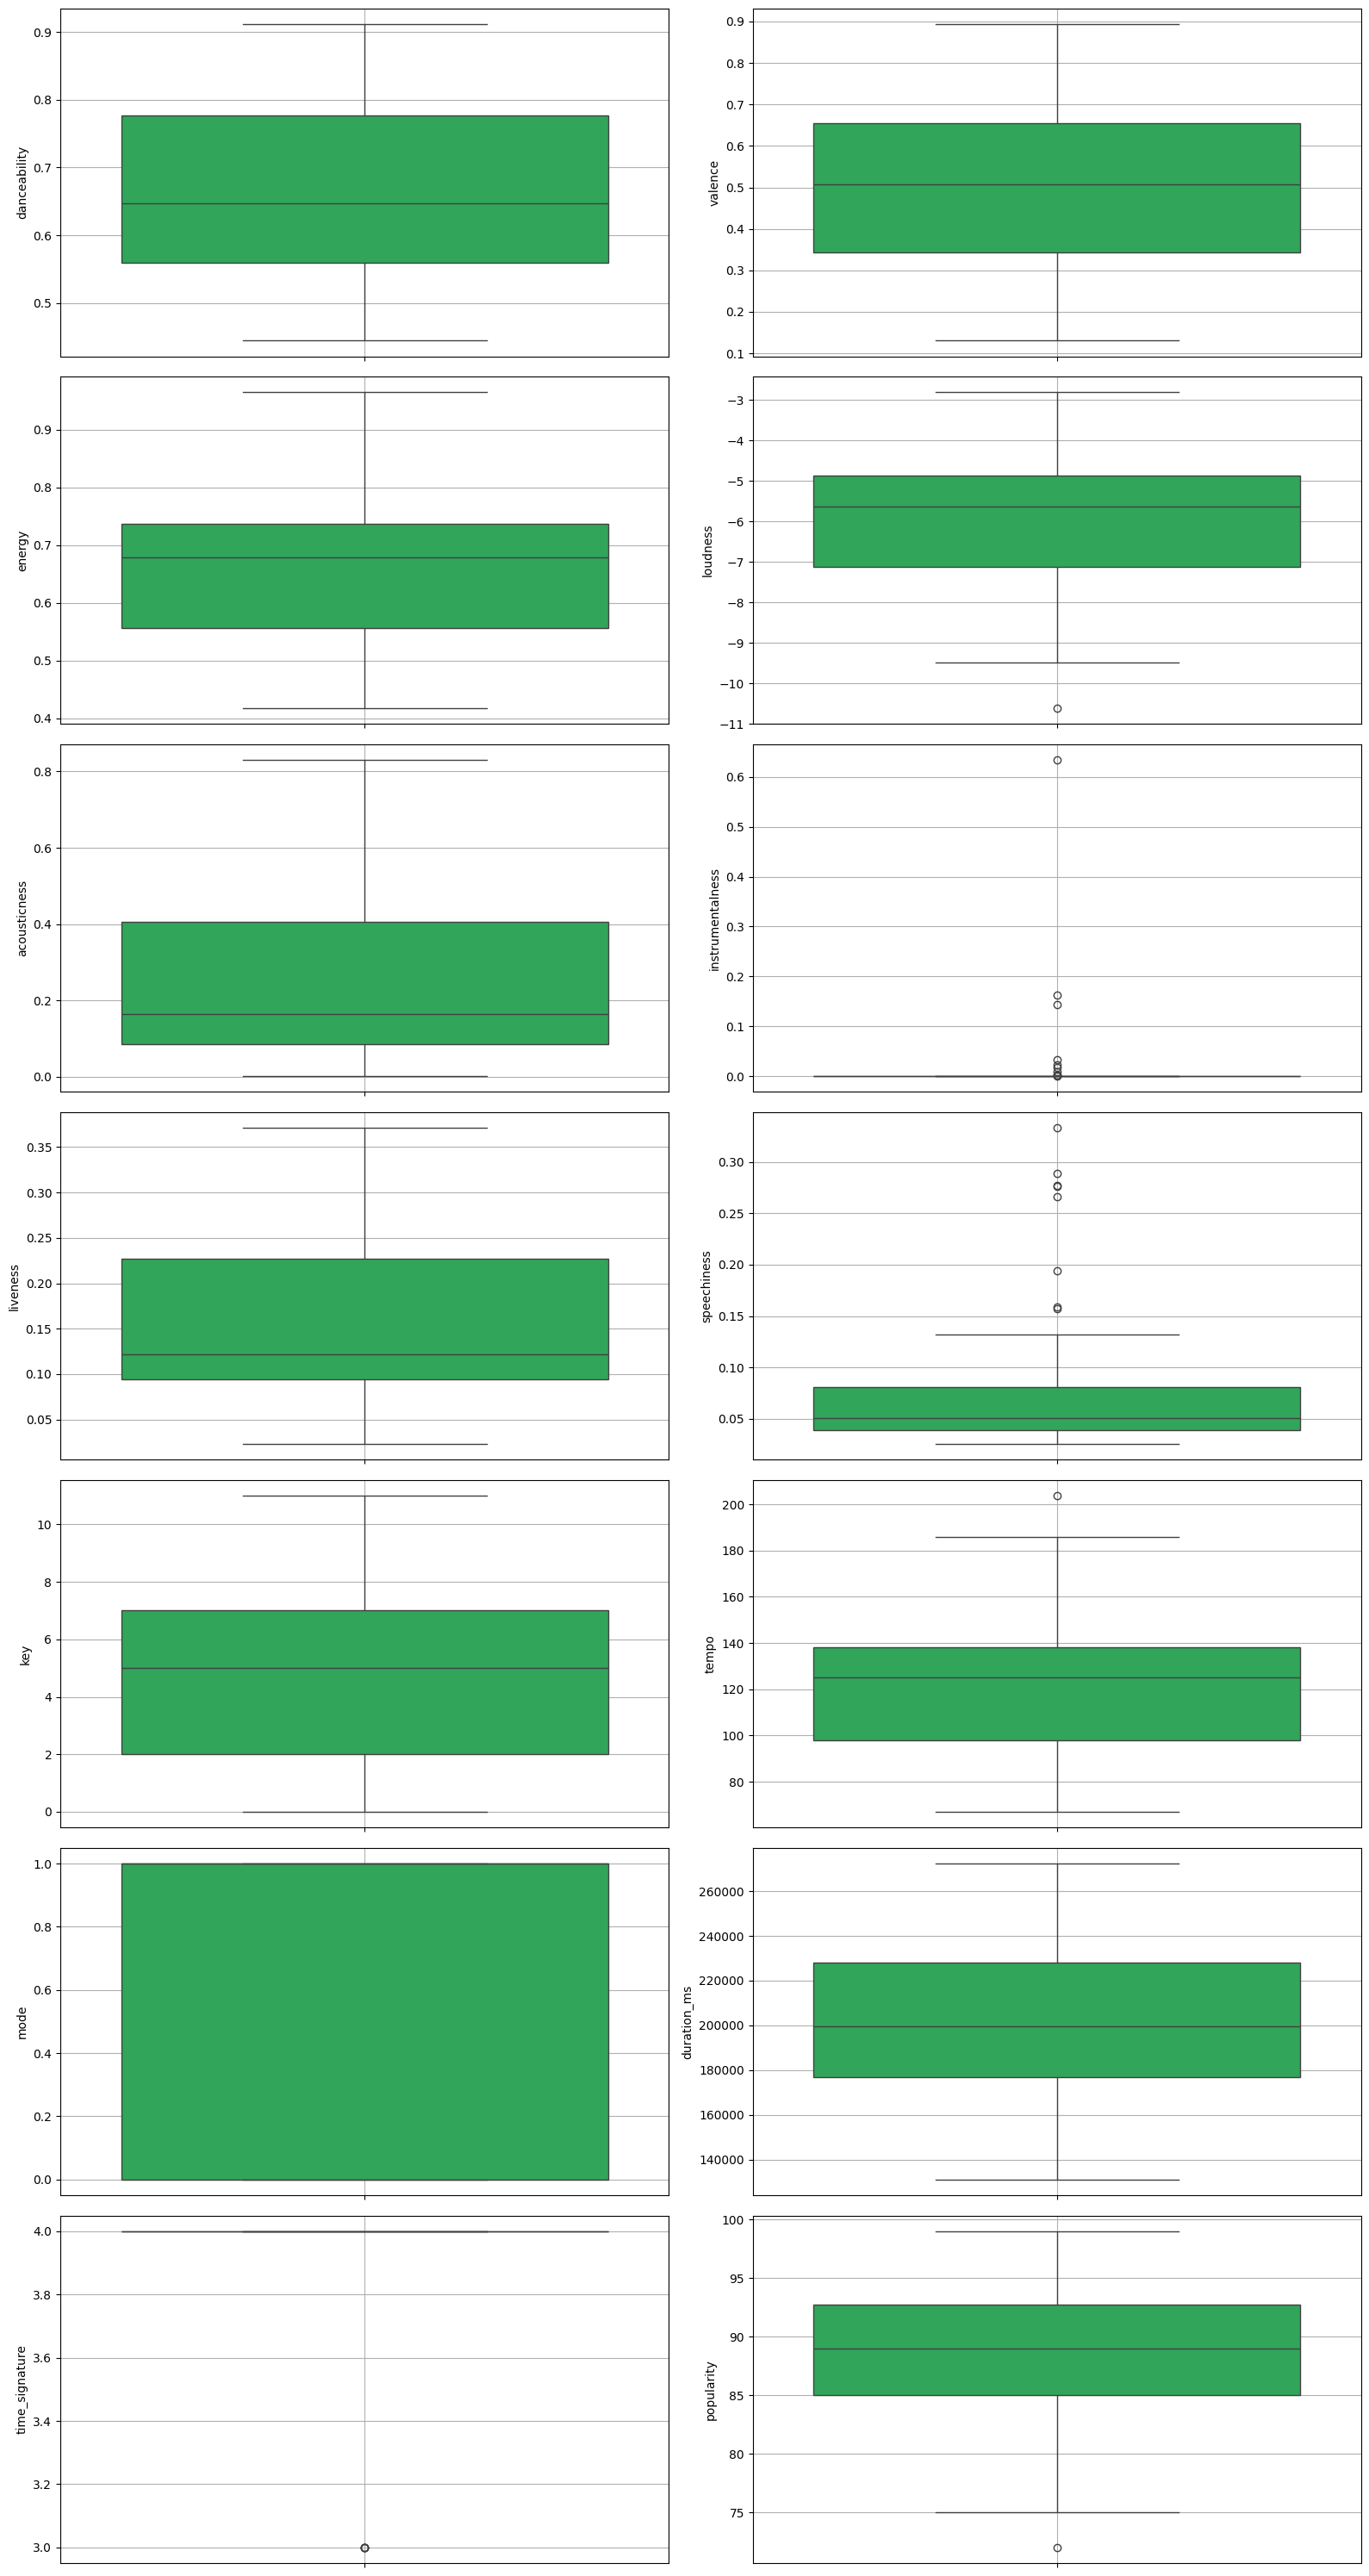

In [27]:
# Plotting the subplots for each variable in a 7x2 grid
plt.figure(figsize=(16, 30))
for i in range(len(variables)):
    plt.subplot(7, 2, i + 1)
    sns.boxplot(y=data[variables[i]], color=  '#1DB954')
    plt.grid('lightgrey')
plt.tight_layout()
plt.show()

# Recommendations


Based on the provided analysis of the music industry data, here are some recommendations:

1. **Focus on Pop Artists**: Given the dominant presence of pop music in the market and its consistently high popularity ratings, consider prioritizing and promoting music from pop artists. This could potentially enhance profitability, considering the diverse audience preferences and the popularity of pop music.

2. **Track Release Timing**: Analyze seasonal trends in music releases, particularly noting the eight songs released in March and comparing this with data from previous years. Understanding these trends can help optimize release timing for new tracks to maximize their impact.

3. **Content Labeling**: Recognize the notable presence of explicit content among the analyzed songs (22 tracks marked as explicit). Ensure proper content labeling and consider offering filtered options for users who prefer non-explicit content.

4. **Song Duration**: Note the variability in song lengths and the tendency towards a certain duration range among popular tracks. When curating playlists or promoting songs, consider the optimal duration range for listener engagement.


5. **Genre Promotion**: While pop music consistently exhibits high popularity ratings, explore ways to promote and support genres with lower popularity ratings, such as "chill pop." This can diversify the platform's offerings and cater to a wider range of listener preferences.

6. **Album Release Strategy**: Analyze the trends in album popularity over time, noting the initial rise followed by a decline around the seventh month and a possible subsequent increase. Consider optimizing album release strategies to capitalize on peak popularity periods and sustain long-term engagement.

By implementing these recommendations, Spotify or any other music platform can enhance user experience, cater to diverse preferences, and optimize content promotion strategies to maximize engagement and profitability.